## Clasificación de imágenes
Para este ejemplo vas a montar un clasificador de imágenes del 0 al 9.

In [2]:
import numpy as np

In [3]:
from sklearn.datasets import load_digits
digits = load_digits() # 8x8 = 64 pixels  -- Very clean Dataset 

#### Now that you have the dataset loaded you can use the commands below

In [4]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [5]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


In [6]:
digits['data'][0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [7]:
set(digits.target)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

#### Check the dataset

In [8]:
# Está balanceado?
digits["target"]

array([0, 1, 2, ..., 8, 9, 8])

#### Plot some numbers

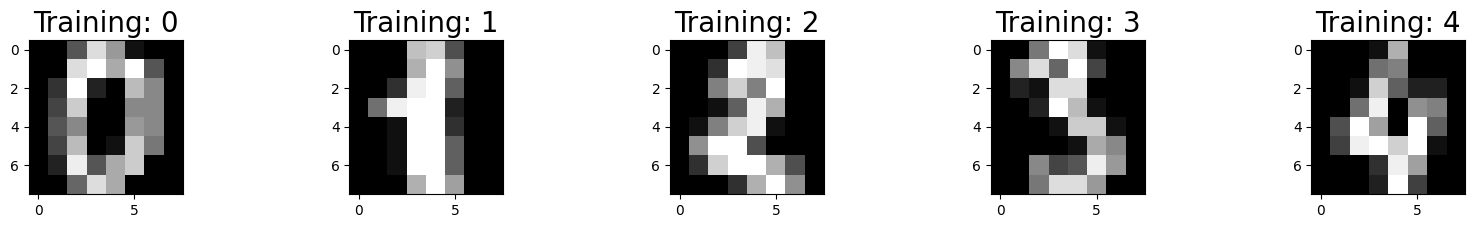

In [9]:
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,2))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    #plt.title('Training: %i\n' % label, fontsize = 20)
    plt.title('Training: ' + str(label), fontsize = 20)

### Splitting Data into Training and Test Sets (Digits Dataset)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits["data"],
                                                   digits["target"],
                                                   test_size = 0.25,
                                                   random_state=42)

In [11]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression(max_iter=10000)
logisticRegr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [12]:
logisticRegr.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### To predict

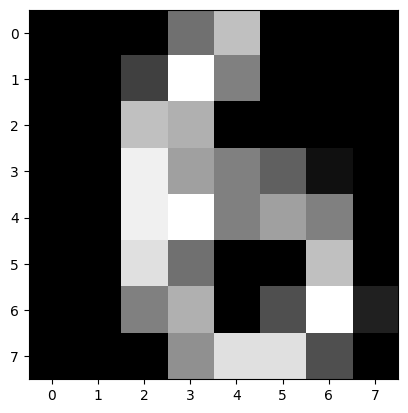

In [14]:
#plt.rcParams['figure.figsize'] = , 2
first_test_image = X_test[0]
plt.imshow(np.reshape(first_test_image, (8,8)), cmap=plt.cm.gray);

In [ ]:
logisticRegr.predict(X_test)[0]
# logisticRegr.predict(x_test[1:2])

6

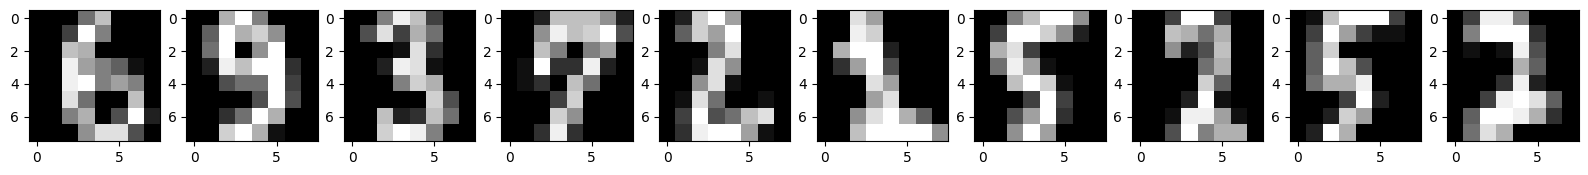

In [ ]:
plt.figure(figsize=(20,2))
for index, (image, label) in enumerate(zip(X_test[0:10], y_test[0:10])):
    plt.subplot(1, 10, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray);

In [ ]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(X_test[:10])

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2])

In [ ]:
y_test[:10]

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2])

### Probabilities

In [ ]:
logisticRegr.predict_proba(X_test)[0]

array([1.24746786e-09, 9.73324199e-11, 1.39071603e-14, 5.25414991e-14,
       1.61240601e-10, 3.23159014e-11, 9.99992889e-01, 1.91572547e-12,
       7.10964606e-06, 4.85442550e-12])

### Measuring Model Performance (Digits Dataset)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
y_pred = logisticRegr.predict(X_test)
score = accuracy_score(y_pred, y_test)
print(score * 100, "%")

97.33333333333334 %


### Matriz de confusión

Eje horizontal: falso positivo

Eje vertical: falso negativo

In [ ]:
import sklearn.metrics as metrics
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[43  0  0  0  0  0  0  0  0  0]
 [ 0 36  1  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 44  0  1  0  0  1  0]
 [ 0  1  0  0 53  0  1  0  0  0]
 [ 0  0  0  0  0 57  1  0  0  1]
 [ 0  0  0  0  0  1 44  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  1]
 [ 0  0  0  0  0  1  0  0 37  0]
 [ 0  0  0  1  0  0  0  0  1 46]]


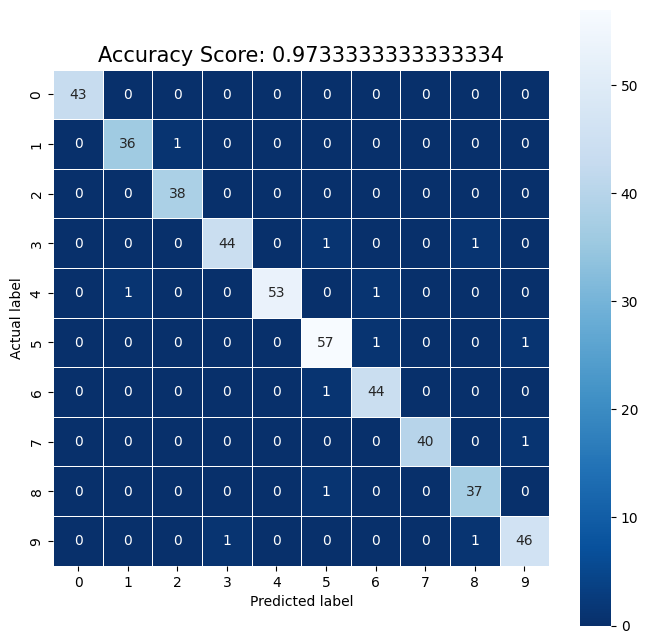

In [ ]:
import seaborn as sns

plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

<AxesSubplot:>

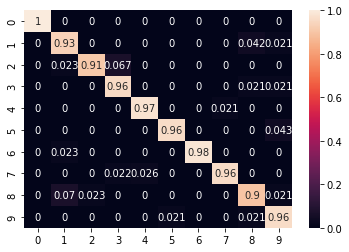

In [ ]:
sns.heatmap(cm/cm.sum(axis=1), annot=True)

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix

multilabel_confusion_matrix(y_test, y_pred)

array([[[407,   0],
        [  0,  43]],

       [[412,   1],
        [  1,  36]],

       [[411,   1],
        [  0,  38]],

       [[403,   1],
        [  2,  44]],

       [[395,   0],
        [  2,  53]],

       [[388,   3],
        [  2,  57]],

       [[403,   2],
        [  1,  44]],

       [[409,   0],
        [  1,  40]],

       [[410,   2],
        [  1,  37]],

       [[400,   2],
        [  2,  46]]], dtype=int64)